<a href="https://colab.research.google.com/github/GyanRout/Projects/blob/main/Mini_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Exploratory Data Analysis (EDA) on Global Terrorism

I will be using Global Terrorism Dataset from Global `https://www.kaggle.com/datasets/START-UMD/gtd`. It has enough details and data for a good Exploratory Data Analysis (EDA) reoprt.

**Motivation**:

Every data analysis begins with a question. My question was sparked by a recent, tragic real-world event: the terrorist attack in Pahalgam, India. As reports surfaced, a familiar narrative re-emerged, linking the incident to Pakistan. This narrative is powerful, but it's also anecdotal. It made me wonder: what's the ground truth?

I wanted to move beyond the headlines and individual incidents to see what the data says. Is this reputation empirically supported? And more broadly, how does the landscape of global terrorism really look when we compare all nations? This project is a journey to test that narrative against the comprehensive data and uncover the true global patterns.

To begin this investigation, my first step was to set up the analytical environment. This involved loading the essential Python libraries—our 'toolkit' for this exploration. By importing Pandas for data manipulation, Matplotlib and Seaborn for visualization, and NumPy for numerical operations, we're equipping ourselves to ingest, clean, and ultimately visualize the complex story hidden within this data.

The Global Terrorism Dataset is incredibly rich—and overwhelmingly large, with over 130 columns. A 'boil the ocean' approach would be inefficient. To get to the signal, my initial data strategy was to perform a critical pre-analysis. I carefully reviewed the data dictionary to understand what each feature represented.

This allowed me to scope the project effectively, distinguishing signal from noise. I strategically curated a more focused dataset, selecting only the columns relevant to our core questions: who, what, where, when, and how. This targeted approach ensures our analysis remains focused and impactful.

Now that we have our driving question and our focused dataset, let's get acquainted with the data itself. This dataset is the foundation of our story. Here is a high-level overview of the key features that will serve as the basis for our exploratory analysis.

**Context** :

Information on more than 180,000 Terrorist Attacks

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

**About Columns:**
1. **eventid** : A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential case number for the given day (0001, 0002 etc).

2. **iyear** : This field contains the year in which the incident occurred.

3. **imonth** : This field contains the number of the month in which the incident occurred.

4. **iday** : This field contains the numeric day of the month on which the incident occurred.

5. **country** : This field identifies the country code

6. **country_txt** : This field identifies the country or location where the incident occurred.

7. **region** : This field identifies the region code based on 12 regions

8. **region_txt** : This field identifies the region in which the incident occurred.

9. **provstate** : Name (at the time of event) of the 1st order subnational administrative region

10. **city** : Name of the city, village, or town in which the incident occurred

11. **latitude** : The latitude of the city in which the event occurred.

12. **longitude** : The longitude of the city in which the event occurred.

13. **success** : Success of a terrorist strike

14. **suicide** : 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.

15. **attacktype1** : The general method of attack

16. **attacktype1_txt** : The general method of attack and broad class of tactics used.

17. **nkill** : The number of total confirmed fatalities for the incident

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects dataset/globalterrorismdb_mini_proj_1.csv", encoding='latin-1')
df = df[['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
         'success', 'suicide', 'nkill', 'attacktype1', 'attacktype1_txt']]
df.rename(columns={
    'iyear':'year',
    'imonth':'month',
    'iday':'day',
    'attacktype1':'attacktype',
    'attacktype1_txt':'attacktype_txt'
}, inplace=True)
df.head()

/tmp/ipython-input-1972302143.py:6: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects dataset/globalterrorismdb_mini_proj_1.csv", encoding='latin-1')


,eventid,year,month,day,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,nkill,attacktype,attacktype_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1.0,1,Assassination
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,0.0,6,Hostage Taking (Kidnapping)
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1.0,1,Assassination
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,3,Bombing/Explosion
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,7,Facility/Infrastructure Attack


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   eventid         181691 non-null  int64  
 1   year            181691 non-null  int64  
 2   month           181691 non-null  int64  
 3   day             181691 non-null  int64  
 4   country         181691 non-null  int64  
 5   country_txt     181691 non-null  object 
 6   region          181691 non-null  int64  
 7   region_txt      181691 non-null  object 
 8   provstate       181270 non-null  object 
 9   city            181256 non-null  object 
 10  latitude        177135 non-null  float64
 11  longitude       177134 non-null  float64
 12  success         181691 non-null  int64  
 13  suicide         181691 non-null  int64  
 14  nkill           171378 non-null  float64
 15  attacktype      181691 non-null  int64  
 16  attacktype_txt  181691 non-null  object 
dtypes: float64

## Refining and Cleaning the dataset

From `df.info()` we saw that a few columns are having missing values, I will be doing the below steps for getting max non NaN data points:

1. Filling `'provstate','city'` columns with value 'Unknown'.
2. Filling `'nkill'` column with value 'NaN'.
3. Changing the datatype of `'attacktype_txt'` column from 'object' to 'category'.

In [137]:
df.fillna({'provstate':'Unknown'}, inplace=True)
df.fillna({'city':'Unknown'}, inplace=True)
df.fillna({'nkill':0}, inplace=True)
df['attacktype_txt'] = df['attacktype_txt'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   eventid         181691 non-null  int64   
 1   year            181691 non-null  int64   
 2   month           181691 non-null  int64   
 3   day             181691 non-null  int64   
 4   country         181691 non-null  int64   
 5   country_txt     181691 non-null  object  
 6   region          181691 non-null  int64   
 7   region_txt      181691 non-null  object  
 8   provstate       181691 non-null  object  
 9   city            181691 non-null  object  
 10  latitude        177135 non-null  float64 
 11  longitude       177134 non-null  float64 
 12  success         181691 non-null  int64   
 13  suicide         181691 non-null  int64   
 14  nkill           181691 non-null  float64 
 15  attacktype      181691 non-null  int64   
 16  attacktype_txt  181691 non-null  categ

In [138]:
df.head()

,eventid,year,month,day,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,nkill,attacktype,attacktype_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1,0,1.0,1,Assassination
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,0.0,6,Hostage Taking (Kidnapping)
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1.0,1,Assassination
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,0.0,3,Bombing/Explosion
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,0.0,7,Facility/Infrastructure Attack


## Actual Analysis

To truly grasp the scope of this global challenge, we must first establish a baseline. We need to zoom out and look at the big picture before we can drill into the details.

My first objective was to build this high-level perspective by mapping the frequency of attacks across our entire timeframe. Has this been a steady, constant threat, or have there been significant shifts and trends?

By aggregating the total number of recorded incidents for each year from 1970 to 2017, we can uncover the overarching historical narrative. This time-series view will act as the backbone of our analysis, allowing us to pinpoint critical periods of escalation and understand the very pulse of global terrorism over the last five decades.

In [139]:
number_of_attacks_per_year = df['year'].value_counts().reset_index()
number_of_attacks_per_year.columns = ['year', 'number_of_attacks']
number_of_attacks_per_year_sorted = number_of_attacks_per_year.sort_values(by='year')
number_of_attacks_per_year_sorted.head()

,year,number_of_attacks
42,1970,651
46,1971,471
44,1972,568
45,1973,473
43,1974,581


Those raw yearly counts are a good start, but a table of 47 numbers just isn't intuitive. It's impossible to grasp the story, the scale, or the speed of change by just reading a list.

To translate this data into meaningful insight, I’ve plotted it as a line graph. This visualization instantly brings the 47-year timeline to life. We can now clearly see the entire historical arc, pinpointing the key trends, the dramatic peaks, and the significant shifts in the frequency of attacks from 1970 to 2017.

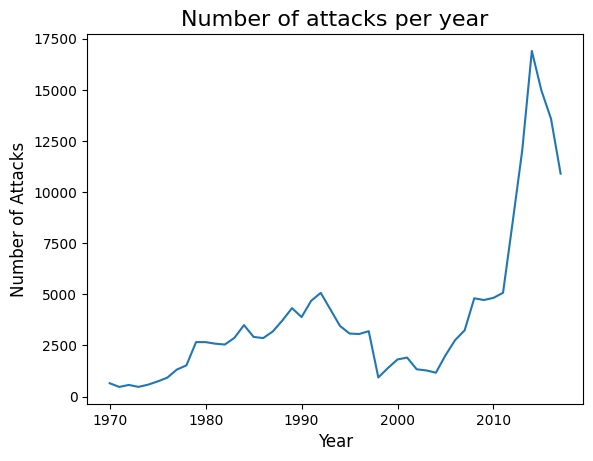

In [140]:
plt.plot(number_of_attacks_per_year_sorted['year'], number_of_attacks_per_year_sorted['number_of_attacks'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Number of attacks per year', fontsize=16)
plt.show()

The timeline graph tells a striking story, which seems to unfold in three distinct acts.

    Act 1: The Emerging Threat (1970s): For the first decade, we see a slow, gradual increase. This represents the early, formative years of the problem.

    Act 2: The Volatile Plateau (1980-2004): The next two decades weren't peaceful, but they were different. The activity becomes highly volatile, with sharp, reactive peaks and valleys, but it all stays within a relatively contained horizontal band.

    Act 3: The Great Escalation (2005-2017): Then, around 2005, the narrative changes completely. We witness a sudden, dramatic, and unprecedented surge in attacks. This escalation is staggering, climbing relentlessly to its grim apex in 2014, which stands as the most intense year for terrorist activity in our entire 47-year record.

This recent, explosive period is clearly the most critical part of our story. The scale of this spike demands a closer look. To truly understand the dynamics of this modern era, we need to zoom in and put this 'Great Escalation' under the microscope. Let's focus our lens on the period from 2010 to 2017.

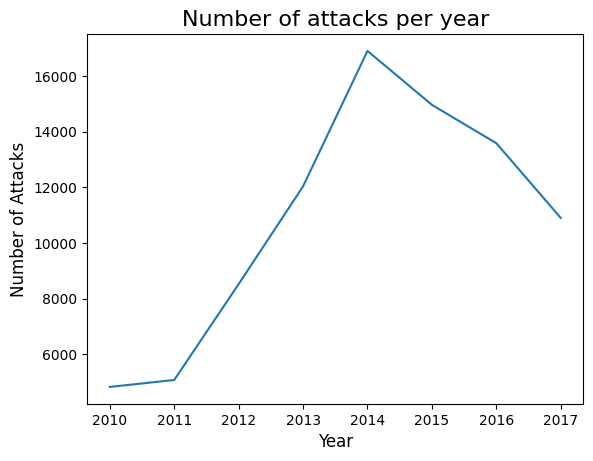

In [141]:
loc_2010= number_of_attacks_per_year_sorted[number_of_attacks_per_year_sorted['year']>=2010]

plt.plot(loc_2010['year'], loc_2010['number_of_attacks'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Number of attacks per year', fontsize=16)
plt.show()

The number of attacks remained relatively stable until the early 2000s, then began a dramatic climb, peaking in 2014. This surge directly mirrors major global conflicts, particularly the rise of the Islamic State (ISIL) in Iraq and Syria, which declared its caliphate in June 2014. This suggests that the nature of global terrorism shifted from smaller, sporadic attacks to large-scale insurgencies in active conflict zones.Now that we know which year was the highest number of attacks commited, we shall check for what type of attacks did the terrorist group do.

In [142]:
attack_type = df['attacktype_txt'].value_counts().reset_index()
attack_type.columns = ['attack_type','number']
attack_type

,attack_type,number
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


We’ve now established the 'when'—the dramatic escalation of attacks in the 21st century. The next critical question in our investigation is the 'how.' What tactics are these groups actually employing? What is the character of these attacks?

My analysis of the attacktype column uncovered an immediate and powerful insight: this is not a story of varied tactics. Instead, the data reveals a clear, dominant strategy. Bombing/Explosion is overwhelmingly the most frequent method, with Armed Assault as a distant second.

But to truly appreciate the scale of this tactical preference, a simple list isn't enough. We need to see the disparity. By plotting these categories on a bar chart, we can move beyond a simple ranking and visually grasp just how heavily the global trend leans on this one method, providing a stark look at the primary 'weapon of choice' for nearly five decades.

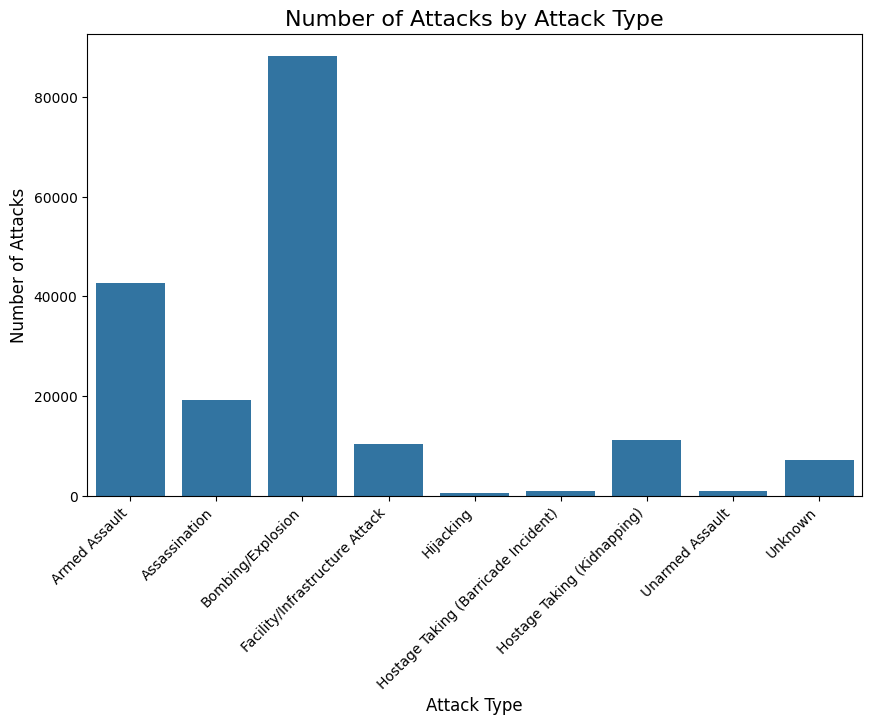

In [143]:
plt.figure(figsize=(10,6))
sns.barplot(x='attack_type', y='number', data = attack_type)

plt.xticks(rotation=45, ha='right')

plt.title('Number of Attacks by Attack Type', fontsize=16)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)

plt.show()

Exactly. The bar chart brings this into sharp focus. It’s not just a subtle lead; it's a story of complete dominance. The data is unequivocal: Bombing/Explosion isn't just number one, it towers over every other method combined.

This visual evidence is critical. It shows us that while a variety of tactics exist, the primary global strategy is one of impersonal, destructive force. The stark drop-off to Armed Assault and Assassination reveals a clear tactical hierarchy. We now understand that the definitive, go-to weapon in the global terrorist's playbook isn't the hijacker or the assassin—it's the bomb.

We've now established when the attacks surged (post-2010) and how they were primarily executed (bombings). The logical next question is: did these two trends happen together? Is the post-2010 'Great Escalation' also a story about the rise of bombings, or did the tactical landscape become more diverse during this period?

To find out, we need to connect these two dimensions. I'll focus our lens on that critical, high-activity period from 2010 onwards. By plotting the types of attacks per year during this modern era, we can move beyond the static, 47-year average and see the evolving tactical 'fingerprint' of this recent surge. This will reveal whether the spike was driven by a single method, or if a mix of tactics emerged.

In [144]:
attack_type_by_year = df.groupby('year')['attacktype_txt'].value_counts().reset_index()
attack_type_by_year = attack_type_by_year[attack_type_by_year['year']>=2010]

attack_type_by_year

,year,attacktype_txt,count
351,2010,Bombing/Explosion,2510
352,2010,Armed Assault,1114
353,2010,Hostage Taking (Kidnapping),391
354,2010,Assassination,360
355,2010,Facility/Infrastructure Attack,293
...,...,...,...
418,2017,Assassination,816
419,2017,Facility/Infrastructure Attack,751
420,2017,Unarmed Assault,101
421,2017,Hostage Taking (Barricade Incident),82


You're right. A raw table of counts, or even a single, over-plotted graph, would be a 'spaghetti mess'—a tangled, unreadable mix of lines where we'd lose the story for each specific tactic.

To get real clarity, we need to untangle these trends.

My approach will be to create a 'small multiples' visualization. Instead of one crowded chart, we'll give each attack type its own individual stage. We'll plot a separate graph for each tactic, all arranged in a single, easy-to-compare panel.

This way, we can instantly see the unique 'fingerprint' of each method during the 2010-2017 surge. We can answer critical questions: Did all tactics rise in unison, or was the surge driven by just one or two? Did 'Kidnapping' follow the same pattern as 'Bombing'?

As you noted, Seaborn's catplot is the perfect tool for this job. It's specifically designed to 'facet' the data this way, allowing us to build this powerful, comparative dashboard with just one simple command.

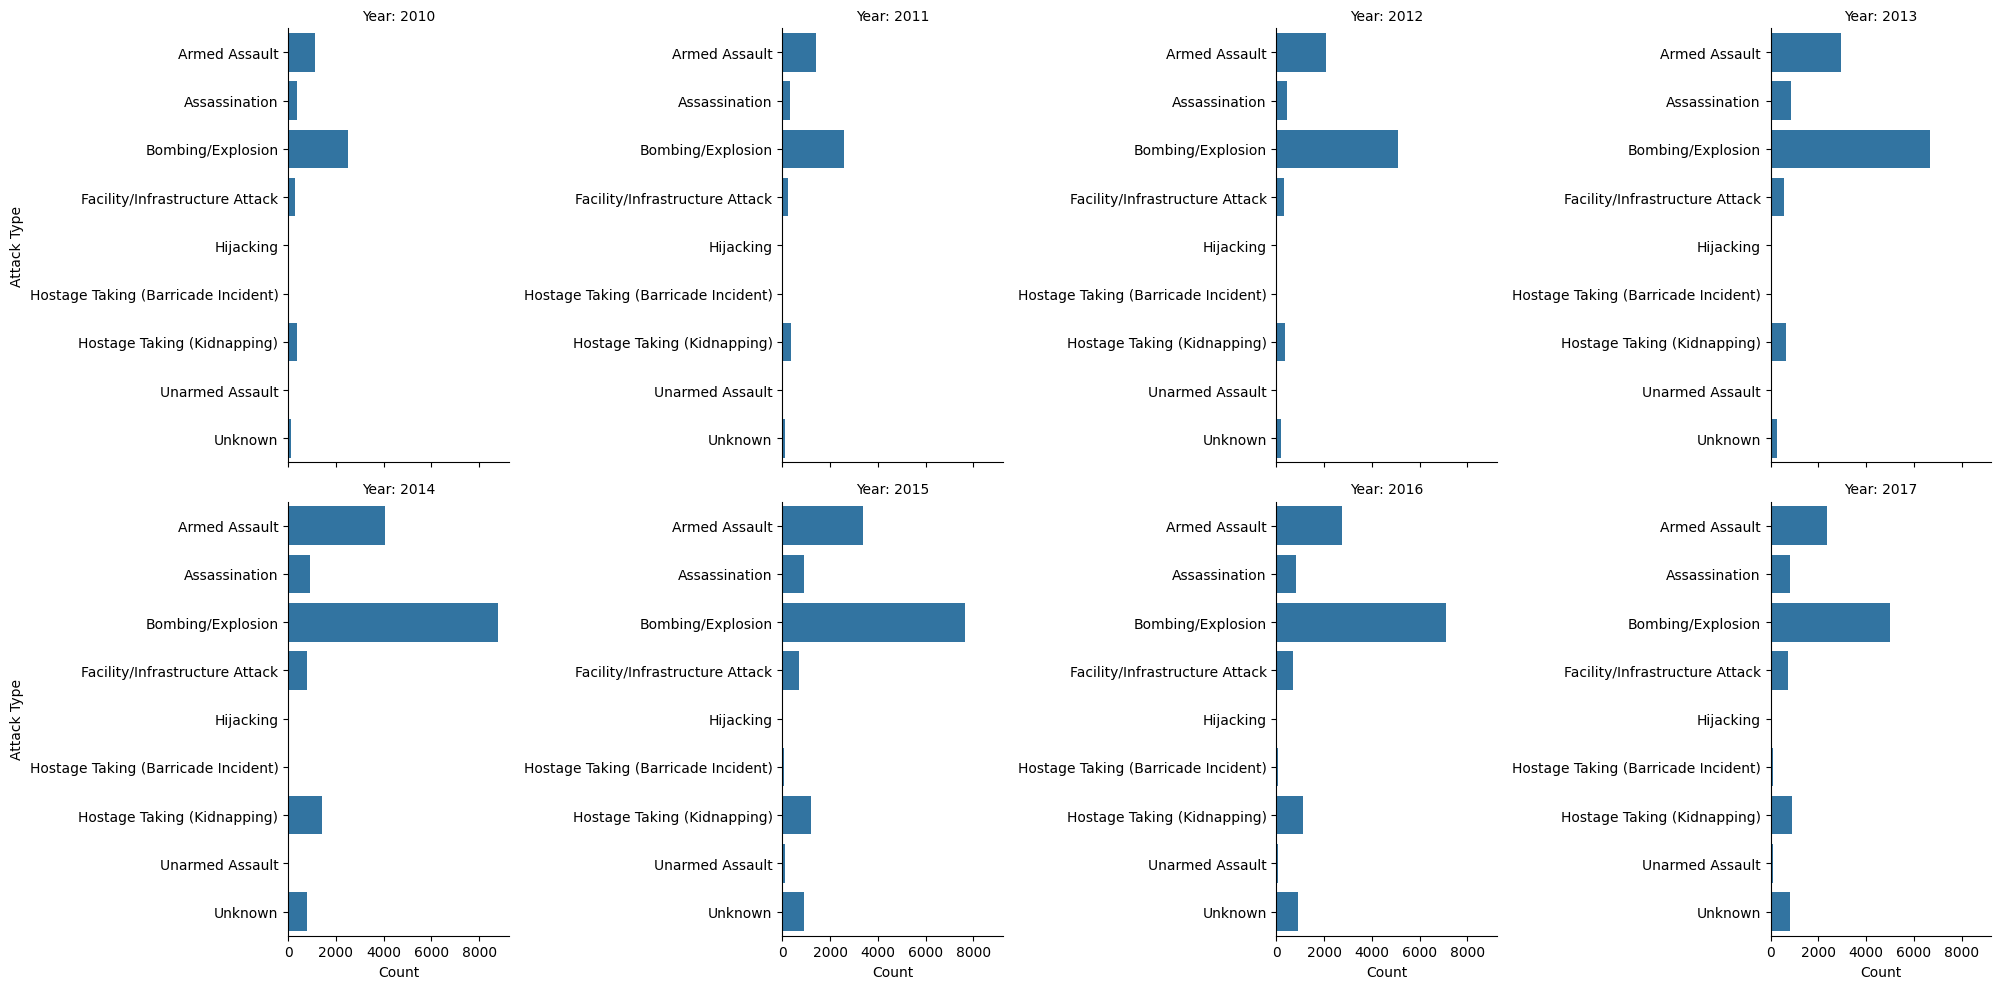

In [145]:
g = sns.catplot(
    data=attack_type_by_year,
    kind='bar',
    x='count',
    y='attacktype_txt',
    col='year',
    col_wrap=4,
    sharey=False,
    height=5
)

g.set_titles("Year: {col_name}")
g.set_axis_labels("Count", "Attack Type")

plt.tight_layout()
plt.show()

Our 'small multiples' plot just confirmed a critical insight: the recent global surge isn't a story of diverse, rising tactics. It's almost entirely a story about one tactic.

The Bombing/Explosion chart didn't just rise—it completely dominated the panel, dwarfing the trends of all other methods. It's not just a significant method; it's the significant method.

This finding acts as a powerful signpost, telling us exactly where to dig next. We must isolate this primary driver.

To understand its full impact, my next step is to treat Bombing/Explosion as its own central narrative. I'll plot its specific trend across the entire 47-year timeline, from 1970 to 2017, to see its long-term evolution. And, just as we did with the main dataset, we'll then zoom into that critical, volatile period—let's use 2007 to 2017—to get a high-definition view of its role in the modern escalation.

In [146]:
attack_type_by_year = df.groupby('year')['attacktype_txt'].value_counts().reset_index()
attack_type_by_year = attack_type_by_year[attack_type_by_year['attacktype_txt']=='Bombing/Explosion']
attack_type_by_year_post_2006 = attack_type_by_year[(attack_type_by_year['year']>=2007) & (attack_type_by_year['attacktype_txt']=='Bombing/Explosion')]
attack_type_by_year.head(), attack_type_by_year_post_2006

(    year     attacktype_txt  count
 0   1970  Bombing/Explosion    333
 9   1971  Bombing/Explosion    239
 19  1972  Bombing/Explosion    188
 28  1973  Bombing/Explosion    149
 36  1974  Bombing/Explosion    285,
      year     attacktype_txt  count
 324  2007  Bombing/Explosion   1866
 333  2008  Bombing/Explosion   2662
 342  2009  Bombing/Explosion   2568
 351  2010  Bombing/Explosion   2510
 360  2011  Bombing/Explosion   2590
 369  2012  Bombing/Explosion   5083
 378  2013  Bombing/Explosion   6685
 387  2014  Bombing/Explosion   8799
 396  2015  Bombing/Explosion   7662
 405  2016  Bombing/Explosion   7108
 414  2017  Bombing/Explosion   5024)

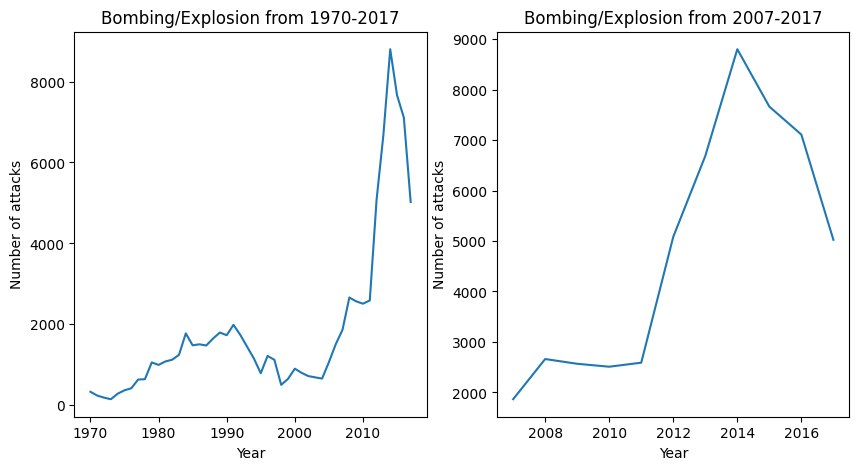

In [147]:
fig, axes =plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].plot(attack_type_by_year['year'], attack_type_by_year['count'])
axes[0].set_title('Bombing/Explosion from 1970-2017')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of attacks')

axes[1].plot(attack_type_by_year_post_2006['year'], attack_type_by_year_post_2006['count'])
axes[1].set_title('Bombing/Explosion from 2007-2017')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of attacks')

plt.show()

This is the 'aha!' moment. As we suspected, the trend line for Bombing/Explosion isn't just similar to the overall attack trend—it's a near-perfect mirror.

This is a critical finding. It confirms that Bombing/Explosion is not just the most popular tactic; it is the primary engine driving the entire global trend. That dramatic, post-2005 escalation that defined our initial chart? We can now confidently state that this was, first and foremost, an escalation of bombings.

While the data doesn't tell us the exact 'why,' it strongly implies that the scalability, accessibility, or tactical effectiveness of explosive devices became the central factor in the growth of modern terrorism.

We have now solidified the 'what' (bombings) and the 'when' (the post-2005 surge). This immediately begs the next, and perhaps most important, question: 'where?'

Is this bombing epidemic a widespread global phenomenon, or is it heavily concentrated? Are all nations feeling this, or are a few specific regions bearing the brunt of this escalation?

To find this out, we must now pivot our analysis from the method to the geography. Let's identify the countries that are at the epicenter of this threat.

In [148]:
number_of_attacks_by_country = df['country_txt'].value_counts().reset_index()
number_of_attacks_by_country.head()

,country_txt,count
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


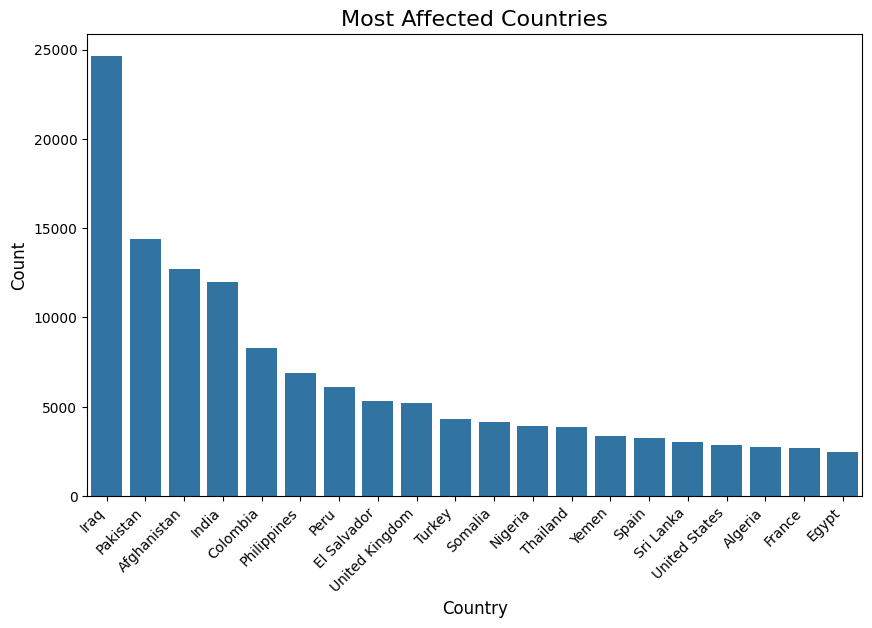

In [149]:
plt.figure(figsize=(10,6))
sns.barplot(x='country_txt', y='count', data=number_of_attacks_by_country.head(20))
plt.xticks(rotation=45, ha='right')

plt.title('Most Affected Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Our pivot to geography has yielded a powerful, if grim, insight. After charting the data from all 205 nations, one country emerged not just as a leader, but as a stark outlier at the very top of the list: Iraq.

While the high numbers for Pakistan, Afghanistan, and India are deeply concerning, they all exist in the shadow of Iraq's staggering incident count. We have now officially identified the absolute epicenter of the crisis.

This is a critical breakthrough. We've found the global 'what' (Bombing/Explosion) and now the global 'where' (Iraq). The next logical question is to connect these two core findings.

Is Iraq's story simply a more concentrated version of the global trend? Or does it have its own unique tactical 'fingerprint'? To answer this, we must zoom in. Let's filter our entire analysis to focus exclusively on Iraq and see which attack types have defined its long and tragic conflict.

In [150]:
affected_countries_by_attack_type = df.groupby('country_txt')['attacktype_txt'].value_counts().reset_index()
Iraq_attack_status = affected_countries_by_attack_type[affected_countries_by_attack_type['country_txt']=='Iraq']
Iraq_attack_status

,country_txt,attacktype_txt,count
756,Iraq,Bombing/Explosion,18286
757,Iraq,Armed Assault,3155
758,Iraq,Assassination,1287
759,Iraq,Hostage Taking (Kidnapping),946
760,Iraq,Unknown,765
761,Iraq,Facility/Infrastructure Attack,154
762,Iraq,Hostage Taking (Barricade Incident),24
763,Iraq,Hijacking,13
764,Iraq,Unarmed Assault,6


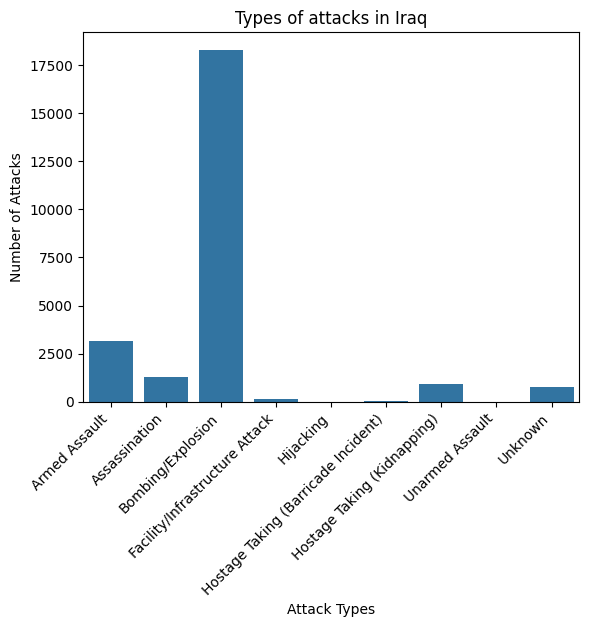

In [151]:
sns.barplot(x='attacktype_txt', y='count', data=Iraq_attack_status)
plt.title('Types of attacks in Iraq')
plt.xlabel('Attack Types')
plt.ylabel('Number of Attacks')

plt.xticks(rotation=45, ha='right')

plt.show()

This is the moment all the threads of our investigation converge and the full picture snaps into focus.

When we drilled down into Iraq—the epicenter we identified—we weren't just met with a confirmation. We found the root cause.

Just as we saw globally, Bombing/Explosion completely dominates Iraq's tactical landscape. But the analysis of weapon type gives us the final, critical piece of the puzzle: the weapon of choice is overwhelmingly Explosives.

This isn't just a pattern; it's the mechanism that explains our entire story.

This combination—Bombing/Explosion as the tactic and Explosives as the tool—represents a terrifyingly efficient and scalable model for insurgency. It's a strategy favored for its devastating logic: it's relatively low-cost, can be deployed by small, independent cells, and is precision-engineered for mass casualties and psychological terror.

We now have a complete, data-driven narrative. That abstract 2014 peak we saw in our very first chart is no longer just a number. We can now confidently state that the 2014 global surge in terrorism was largely the story of the devastatingly effective and scalable use of explosives, concentrated heavily within Iraq.

Our global overview revealed a clear 'Top 4' list of nations most impacted by terrorism: Iraq, Pakistan, Afghanistan, and India.

Having just analyzed the situation in Iraq—the #1 country—and uncovered its bombing-driven crisis, our attention must now turn to the other hotbeds. India, standing at number four on that list, represents a critically significant part of the global story.

It's time to shift our lens. We need to investigate if India's high attack rate is driven by the same 'bombing' narrative we've already uncovered, or if the data reveals a completely different tactical 'fingerprint,' unique to the challenges within its borders. Let's begin our deep dive into the Indian data.


--- Analysis of Attacks in India ---
Total attacks in India (1970-2017): 11960

Top 5 Attack Types in India:
attacktype_txt
Bombing/Explosion                 4825
Armed Assault                     3184
Assassination                     1229
Hostage Taking (Kidnapping)       1184
Facility/Infrastructure Attack     996
Name: count, dtype: int64

Top 5 Affected States in India:
provstate
Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Name: count, dtype: int64


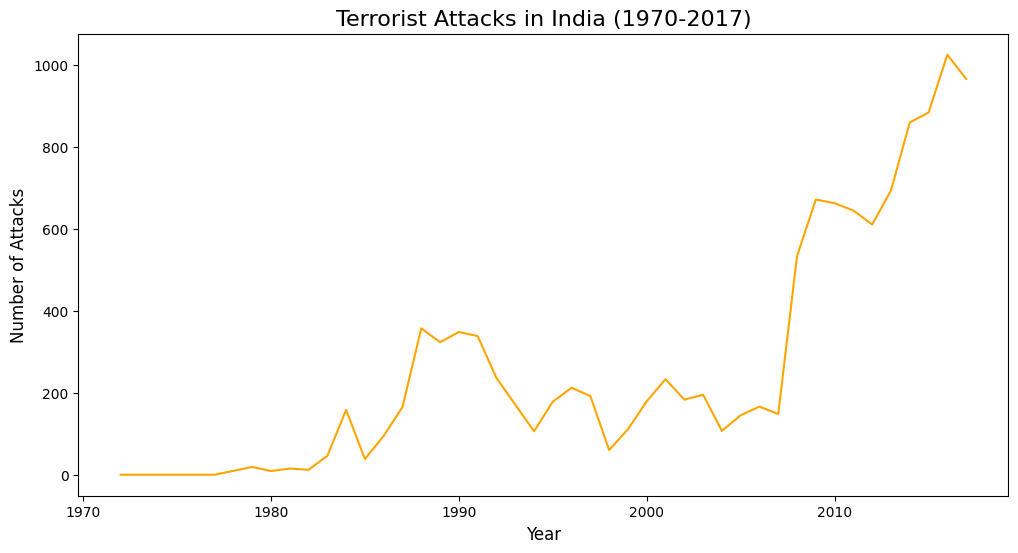

In [152]:
print("\n--- Analysis of Attacks in India ---")

df_india = df[df['country_txt'] == 'India'].copy()

print(f"Total attacks in India (1970-2017): {df_india.shape[0]}")

india_attack_types = df_india['attacktype_txt'].value_counts().head(5)
print(f"\nTop 5 Attack Types in India:\n{india_attack_types}")

india_states = df_india['provstate'].value_counts().head(6)
print(f"\nTop 5 Affected States in India:\n{india_states[india_states.index != 'Unknown']}")

attacks_india_year = df_india.groupby('year')['eventid'].count()

plt.figure(figsize=(12, 6))
attacks_india_year.plot(kind='line', color='orange')
plt.title('Terrorist Attacks in India (1970-2017)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.show()

Our deep dive into the Indian data immediately reveals two critical findings.

First, the 'when': India's timeline is a stark mirror of the global 'Great Escalation.' That same post-2005 inflection point isn't just a minor detail; it's the defining feature of India's recent history, marking a new and far more violent chapter.

Second, the 'where': This is not a diffused, nationwide crisis. When we map the attacks by state, the data points with tragic precision to one region: Jammu and Kashmir. The incident count here towers over every other state, identifying it as the undeniable epicenter of this conflict.

This geographical finding is the key. It directly connects our data back to the real-world narrative that sparked this investigation. The fact that the most-attacked state is not central, but is instead located on the highly contentious western border, is a powerful, data-driven correlation. The numbers are not random; they are telling the exact same story as the headlines—a story of a conflict hyper-concentrated at a geopolitical fault line.

We’ve now established the 'what' (bombings), the 'when' (the post-2005 surge), and the 'where' (the concentration in Iraq, Pakistan, Afghanistan, and India).

But so far, we've only been counting incidents. An 'attack' is an abstract event. To understand the true scale of this story, we must move from the abstract to the all-too-human. We must measure the impact.

Our next chapter is about the human cost. We will pivot our analysis from the frequency of attacks to their lethality.

First, we'll identify which countries have suffered the highest number of total casualties. Then, we'll plot the total number of people killed, year by year, to see if this trend of human loss follows the same horrifying 2014 peak we've already uncovered.

In [153]:
number_of_kills_by_country = df.groupby('country_txt')['nkill'].sum().sort_values(ascending=False).reset_index()
number_of_kills_by_country, number_of_kills_by_country[number_of_kills_by_country['nkill']==0.0]

(             country_txt    nkill
 0                   Iraq  78589.0
 1            Afghanistan  39384.0
 2               Pakistan  23822.0
 3                Nigeria  22682.0
 4                  India  19341.0
 ..                   ...      ...
 200          South Yemen      0.0
 201  St. Kitts and Nevis      0.0
 202    Wallis and Futuna      0.0
 203              Vanuatu      0.0
 204         Vatican City      0.0
 
 [205 rows x 2 columns],
              country_txt  nkill
 188  Antigua and Barbuda    0.0
 189     French Polynesia    0.0
 190     Falkland Islands    0.0
 191               Brunei    0.0
 192                Benin    0.0
 193              Andorra    0.0
 194              Iceland    0.0
 195            Mauritius    0.0
 196           Luxembourg    0.0
 197         New Hebrides    0.0
 198           Martinique    0.0
 199           Seychelles    0.0
 200          South Yemen    0.0
 201  St. Kitts and Nevis    0.0
 202    Wallis and Futuna    0.0
 203              Vanuatu

In [154]:
number_of_kill_over_year = df.groupby('year')['nkill'].sum().reset_index()
number_of_kill_over_year.head()

,year,nkill
0,1970,174.0
1,1971,173.0
2,1972,566.0
3,1973,370.0
4,1974,539.0


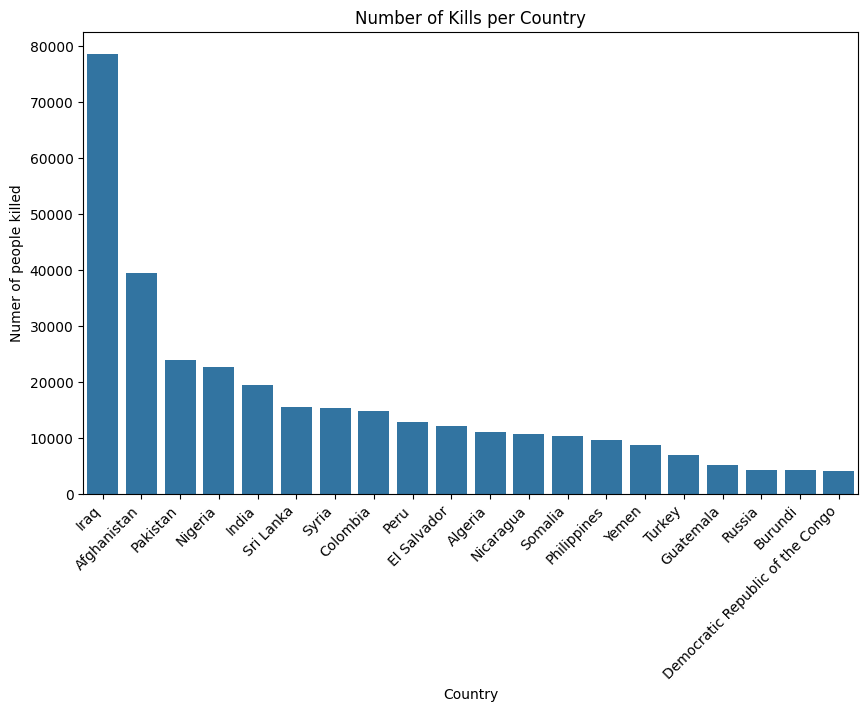

In [155]:
plt.figure(figsize=(10,6))
sns.barplot(x='country_txt', y='nkill', data=number_of_kills_by_country.head(20))
plt.xticks(rotation=45, ha='right')
plt.title('Number of Kills per Country')
plt.xlabel('Country')
plt.ylabel('Numer of people killed')
plt.show()

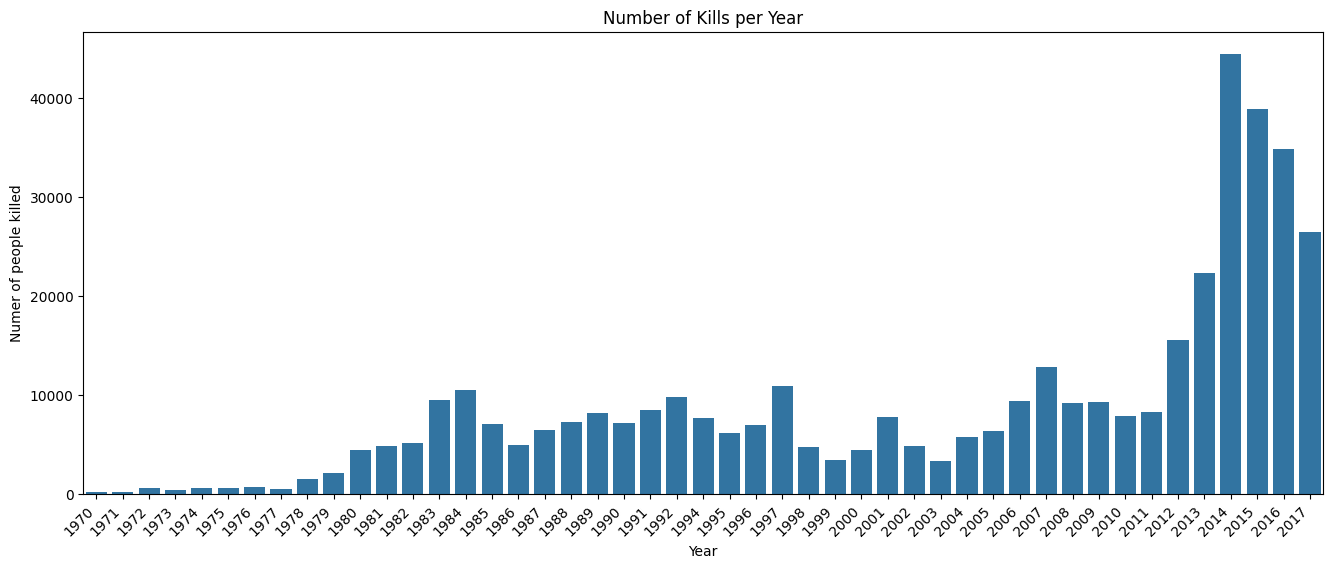

In [156]:
plt.figure(figsize=(16,6))
sns.barplot(x='year', y='nkill', data=number_of_kill_over_year)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Kills per Year')
plt.xlabel('Year')
plt.ylabel('Numer of people killed')
plt.show()

This is the grim confirmation. Our investigation into casualties has led us right back to the same, terrible epicenter: Iraq, and the same catastrophic peak year, 2014. The data is now locked in. We know the 'when' (2014), the 'where' (Iraq), the 'what' (bombings), and the 'impact' (highest casualties).

We now have a complete picture of the event, but we need to understand the nature of the perpetrators themselves. The data allows us to add two crucial, qualitative layers to our analysis.

First, the intent: What was the level of commitment behind these attacks? We can find this by separating the incidents into suicide and non-suicide events. This tells us not just the tactic, but the psychology driving it.

Second, the outcome: We've been analyzing all recorded incidents, but how effective were these operations? We need to filter by the success of the attack.

By exploring these two new dimensions, we can move beyond just 'what happened' and begin to understand the strategic profile and operational effectiveness of the groups behind this violence.

In [157]:
df_suicide = df['suicide'].value_counts()
df_success = df['success'].value_counts()

df_suicide, df_success

(suicide
 0    175058
 1      6633
 Name: count, dtype: int64,
 success
 1    161632
 0     20059
 Name: count, dtype: int64)

This new layer of analysis, focusing on intent and effectiveness, has uncovered a deeply unsettling reality.

First, the intent. We found that suicide attacks, while psychologically devastating, are actually a statistically rare tactic, accounting for just 6,633 of the 181,000+ incidents. This tells us the vast majority of attacks are not 'last-resort' missions but are planned with the perpetrator's escape in mind.

But the second finding is the one that truly defines the challenge. We looked at the success column, and the number is staggering. 161,632 of the 181,691 recorded attacks were deemed successful.

Let's pause on that. This isn't a story of failed plots or intelligence victories. This is a story of overwhelming operational success. The data is telling us that when an attack is launched, it has a nearly 90% chance of succeeding.

This is the core concern for civilian safety. It’s not just the frequency of attacks, but their frighteningly high rate of effectiveness, that makes this a devastatingly real and persistent threat

We constructed a dynamic, multi-layered map to analyze the geographic dimensions of the post-2010 attack surge. The visualization contrasts the density and distribution of all incidents (2010-2017) against the specific event locations from the peak year (2014), enabling a more granular spatiotemporal inquiry.

In [176]:
import folium
from folium.plugins import MarkerCluster, HeatMap

df_map = df.dropna(subset=['latitude','longitude']).copy()
df_map['nkill'] = df_map['nkill'].fillna(0)

In [171]:
df_escalated = df_map[(df['year']>=2010)]

m_heat = folium.Map(location=[20,0], zoom_start=2, tiles='CartoDB positron')

heat_data = df_escalated[['latitude','longitude','nkill']].values.tolist()

HeatMap(
    heat_data,
    name='Attack Intensity (Kills)',
    min_opacity=0.2,
    radius=15,
    blur=20,
    max_zoom=1
).add_to(m_heat)

m_heat.save('Terror_attack_escalation.html')

/tmp/ipython-input-3821084382.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_escalated = df_map[(df['year']>=2010)]


In [178]:
df_2014 = df_map[(df_map['year']==2014)]

m_cluster = folium.Map(location=[20,0], zoom_start=2, tiles='CartoDB dark_matter')

marker_cluster = MarkerCluster().add_to(m_cluster)

for idx, row in df_2014.iterrows():
  lat = row['latitude']
  log = row['longitude']

  popup_txt=f"<b>City:</b>{row['city']}<br>"\
            f"<b>Country:</b>{row['country_txt']}<br>"\
            f"<b>Attack Type:</b>{row['attacktype_txt']}<br>"\
            f"<b>Killed:</b>{row['nkill']}"

  icon = folium.Icon(color='red', icon='info-sign')

  folium.Marker(
      location=[lat,log],
      popup=popup_txt,
      icon=icon
  ).add_to(marker_cluster)

m_cluster.save('Peak_terrorist_attack_year_(2014).html')

**Conclusion**:

This exploratory data analysis of the Global Terrorism Database (1970-2017) reveals a dramatic shift in the nature and scale of global terrorism.

1. Drastic Escalation: After decades of relatively stable activity, terrorist attacks escalated dramatically after 2005, peaking in 2014. This trend is not uniform; it is highly concentrated in Iraq, Afghanistan, Pakistan, and India . The 2014 peak directly correlates with the rise of ISIL in Iraq and Syria, highlighting that modern terrorism is deeply intertwined with active insurgencies and regional conflicts.

2. Dominant Tactic: The primary method of attack is Bombing/Explosion, which is responsible for the vast majority of incidents. This tactic, combined with the high volume of attacks in conflict zones, suggests a strategy focused on guerrilla warfare and inflicting mass casualties rather than complex, symbolic attacks like hijackings.

3. Alarming Success Rate: Most alarmingly, 161,632 of 181,691 (89%) recorded attacks were considered "successful". This indicates that preventative and defensive security measures are frequently bypassed.

Implication: The data shows that global terrorism, particularly in the 2007-2017 decade, was less about small, clandestine cells and more about large-scale, quasi-conventional warfare in a few key hotspots. For security and government agencies, this reinforces the need for strategies focused on counter-insurgency, IED/bomb-making supply chain disruption, and regional stabilization in the Middle East and South Asia, which remain the epicenters of global terrorist activity.

hey here is my EDA mini project on global terrorist attack dataset, i want you to give me advice on how is the project, if its upto the mark of MNCs or not, if not then where can i improve.
the below is my code:
